<a href="https://www.kaggle.com/code/norqui/myfirstcasestudy-cyclistic?scriptVersionId=231965987" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# Google Data Analytics Capstone:  Case Study A
## How does a bike-share company navigate speedy success?

## Introduction

This  case study  consists of analyzing data for year 2023
to see the differences in the use of bikes at Cyclistic, a fictional bike-share company in Chicago. 

The company offers three pricing plans:  single-ride passes, full-day passes, and annual memberships. Customers who select single-ride or full-day passes are referred to as casual riders. Those who purchase annual memberships are Cyclistic members.

The director of the marketing believes the company’s future success
depends on maximizing the number of annual memberships.  She has noted that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs. Therefore, she is convinced that rather than creating a marketing campaign that targets all-new customers, it is better to convert casual riders into members.
 
According to this, to design a new marketing strategy to convert casual riders into annual members is important  to understand how casual riders and annual members use Cyclistic bikes differently. 


The data analysis process consists of 6 steps: Ask, Prepare, Process, Analyze, Share and Act.

# 1)  Ask

Objective: Understand how annual members and casual rides use Cyclistic bikes differently.


To address this problem, I formulate specific questions and answer them by the analysis of data. 

1. How many users were there throughout the year 2023?
2. Which is the percentage of casual and permanent members in that year?
1. What kind of bike is preferred by members and which by casuals?
2. Which  customers use bikes more time?
3. How is related the use of bikes by members with months and week days? 
4. What is the more demanding bike time during the day?



#  2)  Prepare data for exploration

The data are collected by the company Lyft Bikes and Scooters, LLC that operates the City of Chicago’s Divvy bicycle sharing service and is available to the public under the licence [Divvy Data License Agreement](https://divvybikes.com/data-license-agreement).


Since data are located at  the company, the data format is primary, internal and very well structured. The set of data contains unbiased information . It is original and current since data is actualized.  It is not complete as there is missing information, however it is comprehensive since it contains the needed information for address the objective. 


For the analysis I use data distributed by months, from January 2023 till December 2023. 


In [1]:

library(tidyverse)  # package for data manipulation
library(dplyr)      # package for organize and manipulate data
library(lubridate,warn.conflicts = FALSE)  # package for handle date-time data
library(ggplot2)    # package for plots
library(janitor,warn.conflicts = FALSE)    # package to clean data
library(hms,warn.conflicts = FALSE)        # package to store time of day values
library(patchwork)  # packkage to join plots


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Load data 

jan_23 <-read_csv("/kaggle/input/all2023-divvy-tripdata/202301-divvy-tripdata.csv", show_col_types = FALSE)     
feb_23 <-read_csv("/kaggle/input/all2023-divvy-tripdata/202302-divvy-tripdata.csv", show_col_types = FALSE)
mar_23 <-read_csv("/kaggle/input/all2023-divvy-tripdata/202303-divvy-tripdata.csv", show_col_types = FALSE)
apr_23 <-read_csv("/kaggle/input/all2023-divvy-tripdata/202304-divvy-tripdata.csv", show_col_types = FALSE) 
may_23 <-read_csv("/kaggle/input/all2023-divvy-tripdata/202305-divvy-tripdata.csv", show_col_types = FALSE) 
jun_23 <-read_csv("/kaggle/input/all2023-divvy-tripdata/202306-divvy-tripdata.csv", show_col_types = FALSE) 
jul_23 <-read_csv("/kaggle/input/all2023-divvy-tripdata/202307-divvy-tripdata.csv", show_col_types = FALSE) 
aug_23 <-read_csv("/kaggle/input/all2023-divvy-tripdata/202308-divvy-tripdata.csv", show_col_types = FALSE) 
sep_23 <-read_csv("/kaggle/input/all2023-divvy-tripdata/202309-divvy-tripdata.csv", show_col_types = FALSE) 
oct_23 <-read_csv("/kaggle/input/all2023-divvy-tripdata/202310-divvy-tripdata.csv", show_col_types = FALSE) 
nov_23 <-read_csv("/kaggle/input/all2023-divvy-tripdata/202311-divvy-tripdata.csv", show_col_types = FALSE) 
dec_23 <-read_csv("/kaggle/input/all2023-divvy-tripdata/202312-divvy-tripdata.csv", show_col_types = FALSE) 


## Structure and type of data

For each month, the data set is organized in 13 columns. For January there are 190,301 rows. Not all months have the same number of rows, for instance, August has the largest number of rows, 771,693.

There are several kind of data according to the column. For January there are 7 character type columns, 2 are date-time type and 4 double type. 

In [3]:
# to see  column names and type of data for January
glimpse(jan_23)

Rows: 190,301
Columns: 13
$ ride_id            <chr> "F96D5A74A3E41399", "13CB7EB698CEDB88", "BD88A2E670…
$ rideable_type      <chr> "electric_bike", "classic_bike", "electric_bike", "…
$ started_at         <dttm> 2023-01-21 20:05:42, 2023-01-10 15:37:36, 2023-01-…
$ ended_at           <dttm> 2023-01-21 20:16:33, 2023-01-10 15:46:05, 2023-01-…
$ start_station_name <chr> "Lincoln Ave & Fullerton Ave", "Kimbark Ave & 53rd …
$ start_station_id   <chr> "TA1309000058", "TA1309000037", "RP-005", "TA130900…
$ end_station_name   <chr> "Hampden Ct & Diversey Ave", "Greenwood Ave & 47th …
$ end_station_id     <chr> "202480.0", "TA1308000002", "599", "TA1308000002", …
$ start_lat          <dbl> 41.92407, 41.79957, 42.00857, 41.79957, 41.79957, 4…
$ start_lng          <dbl> -87.64628, -87.59475, -87.69048, -87.59475, -87.594…
$ end_lat            <dbl> 41.93000, 41.80983, 42.03974, 41.80983, 41.80983, 4…
$ end_lng            <dbl> -87.64000, -87.59938, -87.69941, -87.59938, -87.599…
$ member_casua

Consistency of data requires that all months have the same number of columns with the same type of data in the respective columns and the same columns names. 
I check the consistency of data type comparing the columns for all months. 

In [4]:
# comparison of data.frames in detail
compare_df_cols(jan_23,feb_23,mar_23,apr_23, may_23,jun_23,jul_23,aug_23,sep_23,oct_23,nov_23, dec_23,return = c( "match"))

column_name,jan_23,feb_23,mar_23,apr_23,may_23,jun_23,jul_23,aug_23,sep_23,oct_23,nov_23,dec_23
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
end_lat,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
end_lng,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
end_station_id,character,character,character,character,character,character,character,character,character,character,character,character
end_station_name,character,character,character,character,character,character,character,character,character,character,character,character
ended_at,"POSIXct, POSIXt","POSIXct, POSIXt","POSIXct, POSIXt","POSIXct, POSIXt","POSIXct, POSIXt","POSIXct, POSIXt","POSIXct, POSIXt","POSIXct, POSIXt","POSIXct, POSIXt","POSIXct, POSIXt","POSIXct, POSIXt","POSIXct, POSIXt"
member_casual,character,character,character,character,character,character,character,character,character,character,character,character
ride_id,character,character,character,character,character,character,character,character,character,character,character,character
rideable_type,character,character,character,character,character,character,character,character,character,character,character,character
start_lat,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


This table shows the match of the data columns  from January to December. The type of data and name of columns agree for all months. 


## Integrity of data

Now, for each month I check for the integrity of data, that is, I look for: 
* messy strings, 
* null values,
* duplicates, 
* date-time conventions 
* number of characters in strings per column. 

#### Messy data
They can be observed directly with View. For January, the column "start_station_id"  has some issues like 
invalid fields or incomplete values as in row 15 as shown below. 


In [5]:
jan_23$start_station_id[15]

[1] "LP-"

#### Null values
In the following I count the number of null values  at each column per month. 

In [6]:
# count missing values
print("Count of missing values in columns  for january")
sapply(jan_23, function(x) sum(is.na(x)))
print("Count of missing values in columns  for february")
sapply(feb_23, function(x) sum(is.na(x)))
print("Count of missing values in columns  for march")
sapply(mar_23, function(x) sum(is.na(x)))
print("Count of missing values in columns  for april")
sapply(apr_23, function(x) sum(is.na(x)))
print("Count of missing values in columns  for may")
sapply(may_23, function(x) sum(is.na(x)))
print("Count of missing values in columns  for june")
sapply(jun_23, function(x) sum(is.na(x)))
print("Count of missing values in columns  for july")
sapply(jul_23, function(x) sum(is.na(x)))
print("Count of missing values in columns  for august")
sapply(aug_23, function(x) sum(is.na(x)))
print("Count of missing values in columns  for september")
sapply(sep_23, function(x) sum(is.na(x)))
print("Count of missing values in columns  for october")
sapply(oct_23, function(x) sum(is.na(x)))
print("Count of missing values in columns  for november")
sapply(nov_23, function(x) sum(is.na(x)))
print("Count of missing values in columns  for december")
sapply(dec_23, function(x) sum(is.na(x)))

[1] "Count of missing values in columns  for january"


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
             26721              26721              27840              27840 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                127                127 
     member_casual 
                 0

[1] "Count of missing values in columns  for february"


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
             25473              25605              26738              26879 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                116                116 
     member_casual 
                 0

[1] "Count of missing values in columns  for march"


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
             35910              35910              38438              38438 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                183                183 
     member_casual 
                 0

[1] "Count of missing values in columns  for april"


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
             63814              63814              68630              68630 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                435                435 
     member_casual 
                 0

[1] "Count of missing values in columns  for may"


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
             89240              89240              95267              95267 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                710                710 
     member_casual 
                 0

[1] "Count of missing values in columns  for june"


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            116259             116259             124050             124050 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                889                889 
     member_casual 
                 0

[1] "Count of missing values in columns  for july"


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            122943             122943             130304             130304 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               1254               1254 
     member_casual 
                 0

[1] "Count of missing values in columns  for august"


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            118919             118919             125568             125568 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               1257               1257 
     member_casual 
                 0

[1] "Count of missing values in columns  for september"


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            101312             101312             107291             107291 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                838                838 
     member_casual 
                 0

[1] "Count of missing values in columns  for october"


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
             84412              84412              89253              89253 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                592                592 
     member_casual 
                 0

[1] "Count of missing values in columns  for november"


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
             55003              55003              57899              57899 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                350                350 
     member_casual 
                 0

[1] "Count of missing values in columns  for december"


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
             35710              35710              37924              37924 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                239                239 
     member_casual 
                 0

In the previous results, the 0 indicates that there is not missing values in the corresponding column. The numbers different from zero indicate the number of missing values. There are several null values in columns 
 "start_station_name", "start_station_id", end_station_name", "end_station_id", "end_lat" and "end_lng".
 
#### Duplicates

Next, I check for duplicates in  columns  "ride_id". 

In [7]:
 # count  duplicated data
sum(duplicated(jan_23$ride_id))
sum(duplicated(feb_23$ride_id))
sum(duplicated(mar_23$ride_id))
sum(duplicated(apr_23$ride_id))
sum(duplicated(may_23$ride_id))
sum(duplicated(jun_23$ride_id))
sum(duplicated(jul_23$ride_id))
sum(duplicated(aug_23$ride_id))
sum(duplicated(sep_23$ride_id))
sum(duplicated(oct_23$ride_id))
sum(duplicated(nov_23$ride_id))
sum(duplicated(dec_23$ride_id))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

The zeros obtained indicate that not duplicates in columns ride_id where found.  




#### Number of characters in strings per column
I also count the number of characters in all columns. 

In [8]:
# count characters in January
print("max number of strings for January")
apply(jan_23,2,function(x) max(nchar(x,keepNA=FALSE)) )
print("min number of strings for January" )
apply(jan_23,2,function(x) min(nchar(x,keepNA=FALSE)))
# count characters in February
print("max number of strings for February")
apply(feb_23,2,function(x) max(nchar(x,keepNA=FALSE)) )
print("min number of strings for February" )
apply(feb_23,2,function(x) min(nchar(x,keepNA=FALSE)))
# count characters in March
print("max number of strings for March")
apply(mar_23,2,function(x) max(nchar(x,keepNA=FALSE)) )
print("min number of strings for March" )
apply(mar_23,2,function(x) min(nchar(x,keepNA=FALSE)))
# count characters in April
print("max number of strings for April")
apply(apr_23,2,function(x) max(nchar(x,keepNA=FALSE)) )
print("min number of strings for April" )
apply(apr_23,2,function(x) min(nchar(x,keepNA=FALSE)))
# count characters in May
print("max number of strings for May")
apply(may_23,2,function(x) max(nchar(x,keepNA=FALSE)) )
print("min number of strings for May" )
apply(may_23,2,function(x) min(nchar(x,keepNA=FALSE)))
# count characters in June
print("max number of strings for June")
apply(jun_23,2,function(x) max(nchar(x,keepNA=FALSE)) )
print("min number of strings for June" )
apply(jun_23,2,function(x) min(nchar(x,keepNA=FALSE)))
# count characters in July
print("max number of strings for July")
apply(jul_23,2,function(x) max(nchar(x,keepNA=FALSE)) )
print("min number of strings for July" )
apply(jul_23,2,function(x) min(nchar(x,keepNA=FALSE)))
# count characters in August
print("max number of strings for August")
apply(aug_23,2,function(x) max(nchar(x,keepNA=FALSE)) )
print("min number of strings for August" )
apply(aug_23,2,function(x) min(nchar(x,keepNA=FALSE)))
# count characters in September
print("max number of strings for September")
apply(sep_23,2,function(x) max(nchar(x,keepNA=FALSE)) )
print("min number of strings for September" )
apply(sep_23,2,function(x) min(nchar(x,keepNA=FALSE)))
# count characters in October
print("max number of strings for October")
apply(oct_23,2,function(x) max(nchar(x,keepNA=FALSE)) )
print("min number of strings for October" )
apply(oct_23,2,function(x) min(nchar(x,keepNA=FALSE)))
# count characters in November
print("max number of strings for November")
apply(nov_23,2,function(x) max(nchar(x,keepNA=FALSE)) )
print("min number of strings for November" )
apply(nov_23,2,function(x) min(nchar(x,keepNA=FALSE)))  
# count characters in December
print("max number of strings for December")
apply(dec_23,2,function(x) max(nchar(x,keepNA=FALSE)) )
print("min number of strings for December" )
apply(dec_23,2,function(x) min(nchar(x,keepNA=FALSE)))     

[1] "max number of strings for January"


ride_id      rideable_type         started_at           ended_at 
                16                 13                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                50                 12                 50                 35 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  8                  9 
     member_casual 
                 6

[1] "min number of strings for January"


ride_id      rideable_type         started_at           ended_at 
                16                 11                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                 2                  2                  2                  2 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  2                  2 
     member_casual 
                 6

[1] "max number of strings for February"


ride_id      rideable_type         started_at           ended_at 
                16                 13                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                50                 12                 50                 35 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  8                  9 
     member_casual 
                 6

[1] "min number of strings for February"


ride_id      rideable_type         started_at           ended_at 
                16                 11                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                 2                  2                  2                  2 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  2                  2 
     member_casual 
                 6

[1] "max number of strings for March"


ride_id      rideable_type         started_at           ended_at 
                16                 13                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                49                 12                 51                 35 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  8                  9 
     member_casual 
                 6

[1] "min number of strings for March"


ride_id      rideable_type         started_at           ended_at 
                16                 11                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                 2                  2                  2                  2 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  2                  2 
     member_casual 
                 6

[1] "max number of strings for April"


ride_id      rideable_type         started_at           ended_at 
                16                 13                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                50                 35                 50                 35 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  8                  9 
     member_casual 
                 6

[1] "min number of strings for April"


ride_id      rideable_type         started_at           ended_at 
                16                 11                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                 2                  2                  2                  2 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  2                  2 
     member_casual 
                 6

[1] "max number of strings for May"


ride_id      rideable_type         started_at           ended_at 
                16                 13                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                51                 35                 51                 35 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  8                  9 
     member_casual 
                 6

[1] "min number of strings for May"


ride_id      rideable_type         started_at           ended_at 
                16                 11                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                 2                  2                  2                  2 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  2                  2 
     member_casual 
                 6

[1] "max number of strings for June"


ride_id      rideable_type         started_at           ended_at 
                16                 13                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                64                 35                 64                 35 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  8                  9 
     member_casual 
                 6

[1] "min number of strings for June"


ride_id      rideable_type         started_at           ended_at 
                16                 11                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                 2                  2                  2                  2 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  2                  2 
     member_casual 
                 6

[1] "max number of strings for July"


ride_id      rideable_type         started_at           ended_at 
                16                 13                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                50                 13                 50                 35 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  8                  9 
     member_casual 
                 6

[1] "min number of strings for July"


ride_id      rideable_type         started_at           ended_at 
                16                 11                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                 2                  2                  2                  2 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  2                  2 
     member_casual 
                 6

[1] "max number of strings for August"


ride_id      rideable_type         started_at           ended_at 
                16                 13                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                64                 13                 64                 35 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  8                  9 
     member_casual 
                 6

[1] "min number of strings for August"


ride_id      rideable_type         started_at           ended_at 
                16                 11                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                 2                  2                  2                  2 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  2                  2 
     member_casual 
                 6

[1] "max number of strings for September"


ride_id      rideable_type         started_at           ended_at 
                16                 13                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                64                 13                 64                 35 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  8                  9 
     member_casual 
                 6

[1] "min number of strings for September"


ride_id      rideable_type         started_at           ended_at 
                16                 12                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                 2                  2                  2                  2 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  2                  2 
     member_casual 
                 6

[1] "max number of strings for October"


ride_id      rideable_type         started_at           ended_at 
                16                 13                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                50                 13                 50                 35 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  8                  9 
     member_casual 
                 6

[1] "min number of strings for October"


ride_id      rideable_type         started_at           ended_at 
                16                 12                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                 2                  2                  2                  2 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  2                  2 
     member_casual 
                 6

[1] "max number of strings for November"


ride_id      rideable_type         started_at           ended_at 
                16                 13                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                51                 13                 49                 35 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  8                  9 
     member_casual 
                 6

[1] "min number of strings for November"


ride_id      rideable_type         started_at           ended_at 
                16                 12                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                 2                  2                  2                  2 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  2                  2 
     member_casual 
                 6

[1] "max number of strings for December"


ride_id      rideable_type         started_at           ended_at 
                16                 13                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                49                 13                 46                 36 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  8                  9 
     member_casual 
                 6

[1] "min number of strings for December"


ride_id      rideable_type         started_at           ended_at 
                16                 12                 19                 19 
start_station_name   start_station_id   end_station_name     end_station_id 
                 2                  2                  2                  2 
         start_lat          start_lng            end_lat            end_lng 
                 8                  9                  2                  2 
     member_casual 
                 6

 I observe that  the columns ride_id, rideable_type, started_at, ended_at, start_lat,  start_lng  and member_casuals are consistent in the sense that the number of characters is coherent along all the rows for each month.

* For "ride_id", the number of characters is 16 and is constant along the column .
* In "rideable_type" we have a maximum of 16 characters corresponding to the type "electric_bike" 
and a minimum of 11 characters associated with the type "docked_bike". The number of characters for this
column does not go beyond these limits. 
* The columns "started_at" and "ended_at" are type POSIXct which consist of date and time. There are 10 
characters for date a 8 for time that together with a space between date and time gives 19 characters. This
number is preserved along these two columns. 
* "start_lat" and "start_lng"  columns are numerics and consist of 8 characters that are preserved along the columns.
* The column "member_casual" is a type string and contains a maximum number of 6, corresponding either to "casual" or "member" customer.
 
For the other columns, the number of characters has a large range of variability among the several months as can be seen for instance in column "start_station_name".



In conclusion, the columns "start_station_name", "start_station_id", end_station_name", "end_station_id", "end_lat" and "end_lng"  contain several  missing values, and contain messy strings with  a diverse number of characters and some strings have spelling problems. 
With regard to  the integrity of data,  the columns "ride_id", "rideable_type", "started_at", "ended_at", "start_lat",  "start_lng"  and "member_casuals"  are more trusted to work with. They are reliable, original, comprehensive, current, and cited. 



# 3) Process Data from dirty to clean  

 In the following, I work only with  the columns "rideable_type", "started_at", "ended_at" and "member_casuals"  since they are enough to address the raised questions. I will not consider the columns "start_lat" and "start_lng" since they are useful for spatial location and my analysis is concentrated more on temporal behaviors. 
 
 - First, I merge all months into a unique data frame. 
 - Then, I select the specific columns mentioned above.
 - Next,  I add  new columns related to the date, day of the week and month of the started_at column. The label i in the name of the columns refers to  "initial". 

In [9]:
# selecting  specific attributes

df <- rbind(jan_23, feb_23,mar_23, apr_23,may_23,jun_23,jul_23,aug_23,sep_23,oct_23,nov_23,dec_23) %>%
       select(rideable_type, started_at, ended_at, member_casual) %>%
       mutate(. ,  second.i = second(started_at),
                   minute.i = minute(started_at),
                   time.i = format(started_at, '%T'),
                   hour.i = hour(started_at),
                   date.i = day(started_at),
                   day.i = wday(started_at, label = TRUE),
                   month.i = month(started_at, label = TRUE), 
                   
             )

# 4) Analize

* To answer the first question:  How many users are registered at 2023?

In [10]:
# Count users by customers
n_users<- df %>% select(member_casual) %>%  # select column member_casual
  count(., member_casual ) %>%              # count the number of customers
  mutate(perc = `n` / sum(`n`)) %>%         # compute the porcentage
  arrange(perc) %>%                         # arrange for ascending porcentage
  mutate(labels = scales::percent(perc))
n_users

member_casual,n,perc,labels
<chr>,<int>,<dbl>,<chr>
casual,2059179,0.3600041,36%
member,3660698,0.6399959,64%


There are 5 719 877 customers, 64% (3 660 698) are members while the 36% (2 059 179) are casuals. 

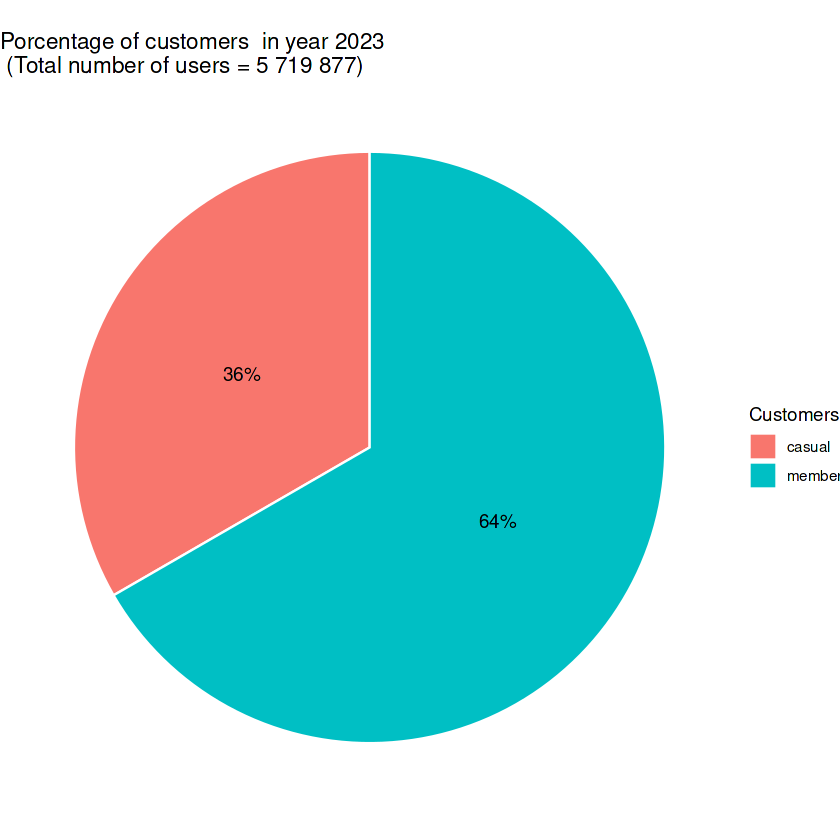

In [11]:
# Barplot for the number of users by customers
ggplot(n_users, aes(x = "", y = member_casual, fill = member_casual)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") +
  theme_void()+
 labs(title= "Porcentage of customers  in year 2023 \n (Total number of users = 5 719 877)") +
 guides(fill = guide_legend(title = "Customers"))


*  Next, for the second question: what kind of bike is preferred by members and  casuals?. First, I check the type of bikes. 

In [12]:
# unique rideable_type values by month

type_bike <- df %>%
   group_by(rideable_type, month.i) %>%    
  summarize(count = n_distinct(rideable_type), type =unique(rideable_type))
   
type_bike


`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


rideable_type,month.i,count,type
<chr>,<ord>,<int>,<chr>
classic_bike,Jan,1,classic_bike
classic_bike,Feb,1,classic_bike
classic_bike,Mar,1,classic_bike
classic_bike,Apr,1,classic_bike
classic_bike,May,1,classic_bike
classic_bike,Jun,1,classic_bike
classic_bike,Jul,1,classic_bike
classic_bike,Aug,1,classic_bike
classic_bike,Sep,1,classic_bike


There are three types: electric, classical and docked bikes. 
Docked bikes are not registered from September till December.


Now, I count the number of users by bike type and then I plot the proportions by customers.

In [13]:
# Count number of users by type of bike
 n.bike.users <-  df %>% 
  select(rideable_type, member_casual)  %>%
  group_by(member_casual) %>%
  count(rideable_type) %>%
  mutate(perc = n/sum(n)) %>%
  arrange(perc) %>%
  mutate(labels = scales::percent(perc))
n.bike.users 

member_casual,rideable_type,n,perc,labels
<chr>,<chr>,<int>,<dbl>,<chr>
casual,docked_bike,78287,0.03801855,4%
casual,classic_bike,876881,0.42584010,43%
member,classic_bike,1819130,0.49693528,49.69%
member,electric_bike,1841568,0.50306472,50.31%
casual,electric_bike,1104011,0.53614135,54%


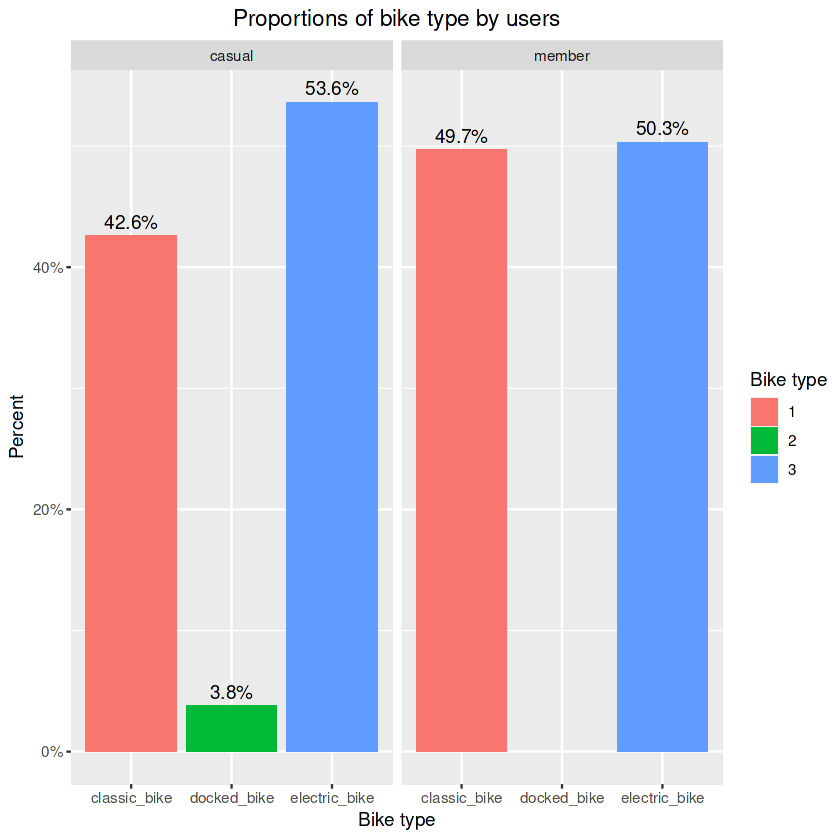

In [14]:
# Plot the proportions of bike-users
 df %>% select(rideable_type, member_casual)%>%
ggplot(., aes(x=rideable_type, group=member_casual))+ 
geom_bar(mapping = aes(y = after_stat(prop), fill = factor(after_stat(x))), stat="count") +
    geom_text(aes(label = scales::percent(after_stat(prop), accuracy = 0.1), y= after_stat(prop)), stat= "count", vjust = -.5) +
    labs(y = "Percent", fill="Bike type", x = "Bike type") +
    facet_grid(~ member_casual) +
    scale_y_continuous(labels = scales::percent) +
    ggtitle("Proportions of bike type by users") +
  theme(plot.title = element_text(hjust = 0.5))

From these results, we observe that members prefer electric bikes and classic bikes approximately in the same proportion. On the other hand, members are not interested into docked bikes.
Casual members have a highest preference for electric bikes but they also prefer classic bikes, there is a  a small preference of 3.8 % for  docked bikes. 

 * The next question, which customers take more time using the bikes? For this, I use the columns "started_at", "ended_at", "member_casual" and "day.i" to create a new data frame.
Then, I compute the trip duration of customers  as the time interval  between the "started_at" and "ended_at". I include  the time intervals to the new data frame as columns according to time units: minutes, hours, days and weeks.   


In [15]:

#  dt time interval in seconds, minutes, hours and weeks
trip.dur <- df %>% select(started_at, ended_at, member_casual,day.i, month.i) %>%
  mutate(., dt.min = (ended_at - started_at)/dminutes(1),
            dt.hour = (ended_at - started_at)/dhours(1),
            dt.day = (ended_at - started_at)/ddays(1),
            dt.week = (ended_at - started_at)/dweeks(1)
        )

After that, I compute the mean along the year.


In [16]:
trip.dur %>% group_by(member_casual) %>%
   summarize(mean.min= mean(dt.min),
            max.min= max(dt.min),
            max.hour= max(dt.hour),
            max.day= max(dt.day)
            
)

member_casual,mean.min,max.min,max.hour,max.day
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,28.22453,98489.067,1641.48444,68.395185
member,12.51317,1559.667,25.99444,1.083102


From this table,I observe that casual customers take an average trip duration around 30 min at the year, while members take a trip duration of almost 13 min, that is 17 min less than casual customers.  With regards to the maximum trip duration along the year, it was of 68 days for casual members, this is so much compared with the maximal trip duration of members that is 1 day.


It is possible to obtain also the mean by month. 

In [17]:
ave.month <- trip.dur %>% group_by(member_casual, month.i) %>%
   summarize(mean.min= mean(dt.min),
             .groups = "drop") 
ave.month

member_casual,month.i,mean.min
<chr>,<ord>,<dbl>
casual,Jan,22.91484
casual,Feb,23.19252
casual,Mar,21.41228
casual,Apr,27.67276
casual,May,28.51983
casual,Jun,29.40618
casual,Jul,32.33308
casual,Aug,35.24275
casual,Sep,25.18390


In [18]:
ave.month%>%
  group_by(member_casual) %>%
  summarise(max = max(mean.min, na.rm=TRUE))


member_casual,max
<chr>,<dbl>
casual,35.24275
member,13.77183


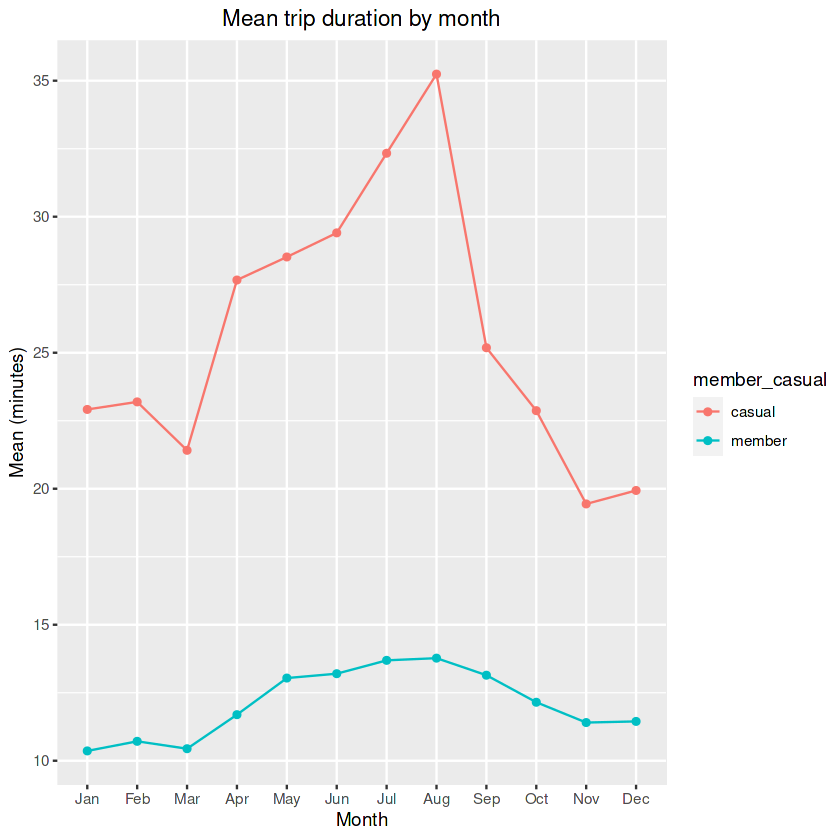

In [19]:
ggplot(ave.month, aes(x = month.i, y = mean.min,  color = member_casual, group=member_casual)) +
geom_line() + geom_point() +
 ggtitle("Mean trip duration by month") +
  theme(plot.title = element_text(hjust = 0.5)) +
   labs(y = "Mean (minutes)", fill= "Customer", x = "Month") 

In [20]:
ave.day <- trip.dur %>% group_by(member_casual, day.i) %>%
   summarize(mean.min= mean(dt.min),
             .groups = "drop") 
ave.day

member_casual,day.i,mean.min
<chr>,<ord>,<dbl>
casual,Sun,32.75759
casual,Mon,27.71351
casual,Tue,25.08331
casual,Wed,24.26050
casual,Thu,24.72495
casual,Fri,27.26078
casual,Sat,32.13722
member,Sun,13.90636
member,Mon,11.90192


Now, the average trip duration by days of the week.

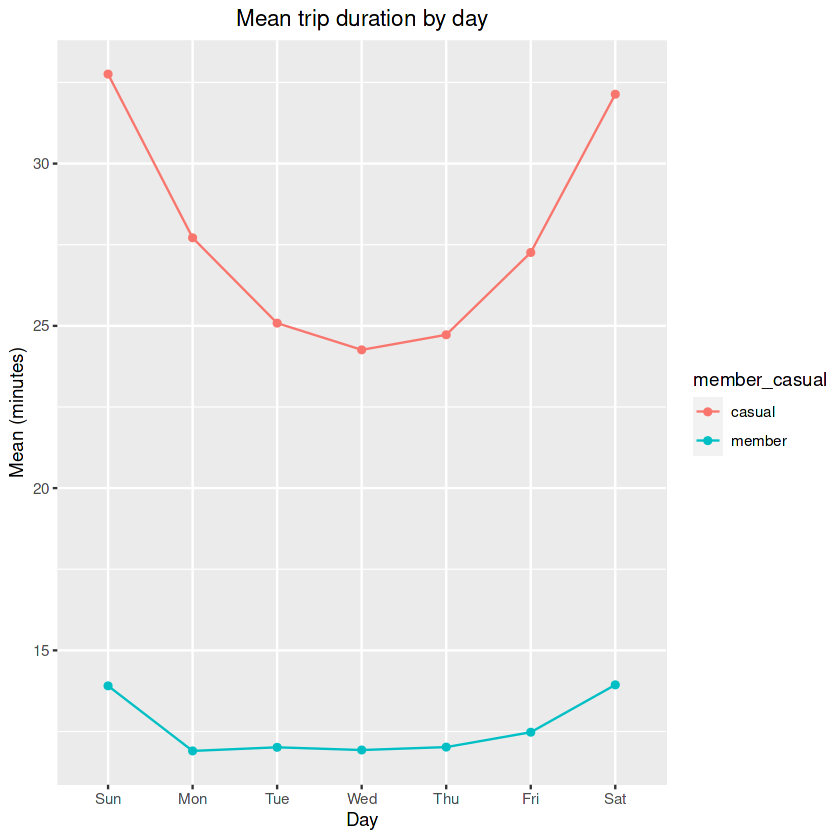

In [21]:
ggplot(ave.day, aes(x = day.i, y = mean.min,  color = member_casual, group=member_casual)) +
geom_line() + geom_point() +
 ggtitle("Mean trip duration by day") +
  theme(plot.title = element_text(hjust = 0.5)) +
   labs(y = "Mean (minutes)", fill="Customers", x = "Day") 

These last two plots show than in average, casual riders have longer trip durations than members. 

* About the relation of the number of users by month, there are more member rides along the year than casuals. June, July and August are the months of more demand for both cases. 

Here, I show the number of bikes  rented per month in 2023  using the started_at column.

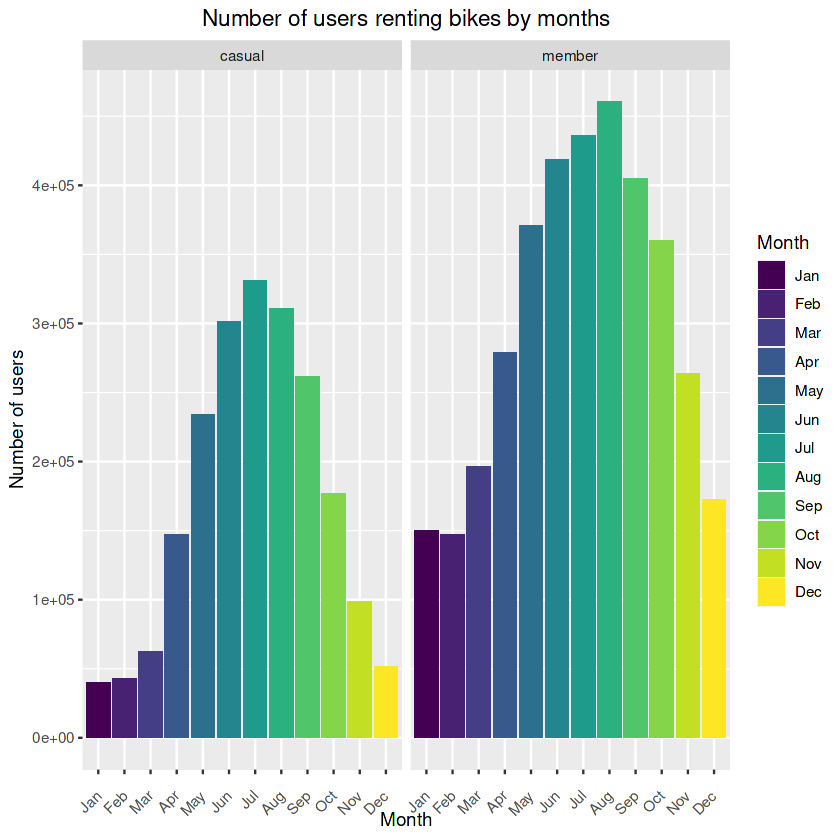

In [22]:
ggplot(df) + geom_bar(mapping =  aes(x = month.i,fill=month.i)) +
   facet_wrap(~ member_casual) +
   ggtitle("Number of users renting bikes by months") +
  theme(plot.title = element_text(hjust = 0.5))+
   labs(y = "Number of users", fill="Month", x = "Month") +
   theme(axis.text.x = element_text(angle=45, vjust=.5, hjust=1))

Number of users renting bikes by week is plotted below. Again, there is a considerable amount of member riders along the week compared to casual riders. 
There are more member riders during working days indicating that members use bikes to ride work. On the other hand,  casual riders prefer weekends for their trips.

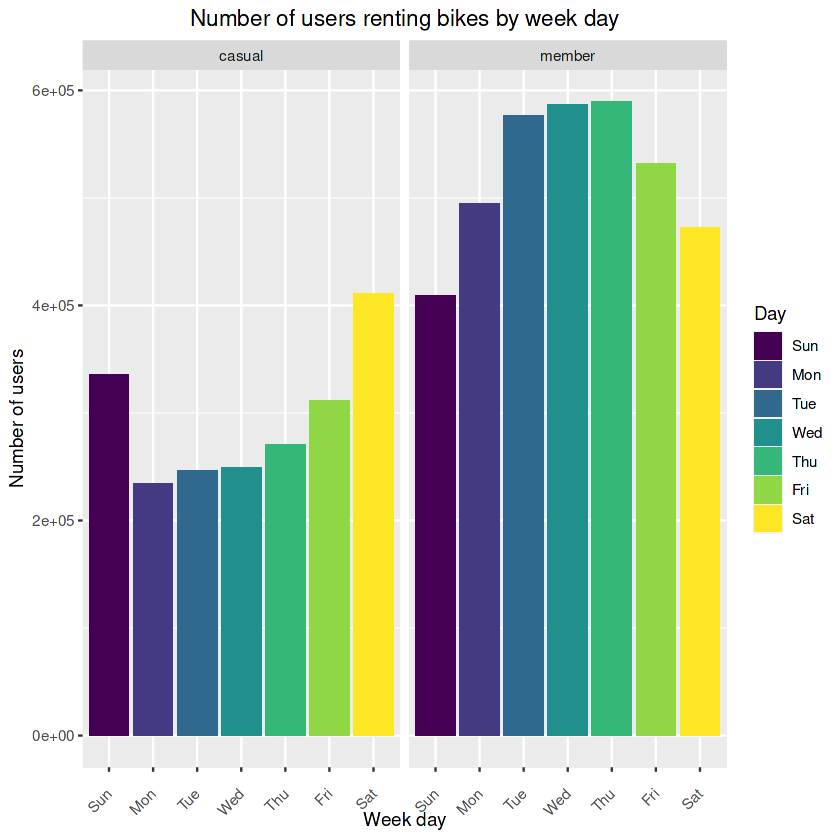

In [23]:
# plot users per week
ggplot(df) + geom_bar(mapping =  aes(x = day.i,fill= day.i)) +
   facet_wrap(~ member_casual) +
 theme(plot.title = element_text(hjust = 0.5))+
  ggtitle("Number of users renting bikes by week day") +
   labs(y = "Number of users", fill="Day", x = "Week day") +
   theme(axis.text.x = element_text(angle=45, vjust=.5, hjust=1))
  

* Finally, what is the more demanding bike time during the day? For this, I plot the number of users against the time column of my data frame.

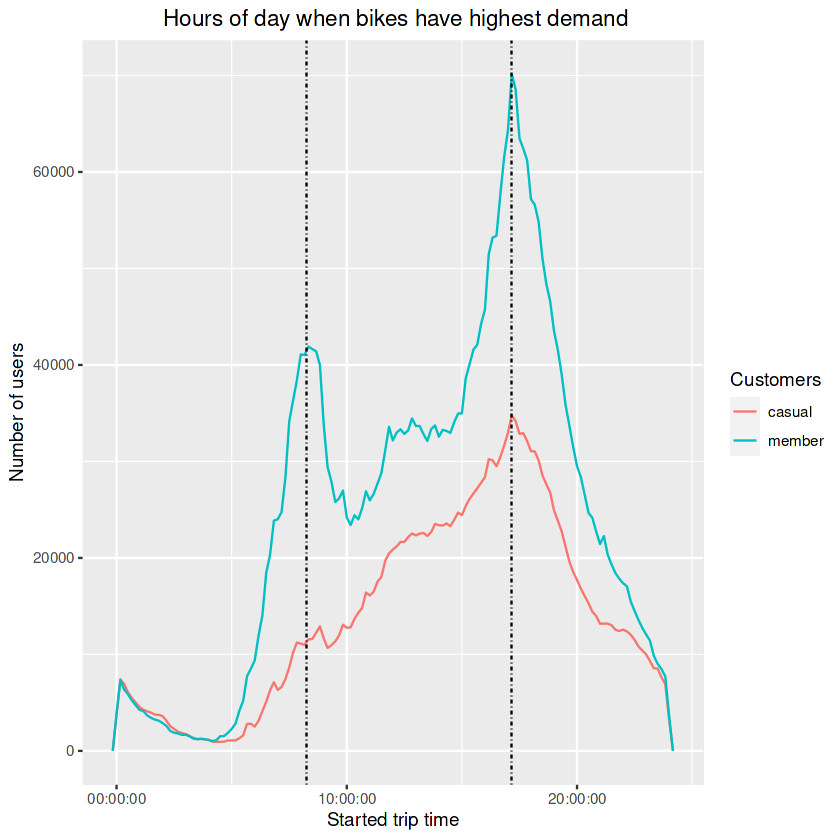

In [24]:
df %>% 
 ggplot(aes(as_hms(time.i), color = member_casual)) +
 geom_freqpoly(binwidth = 600 ) + # 600 segundos = 10 minutos 
 geom_vline(xintercept=as_hms("17:10:00"),color="black",  linetype=4) +
 geom_vline(xintercept=as_hms("8:15:00"),color="black",  linetype=4) +
 ggtitle( " Hours of day when bikes have highest demand") +
   theme(plot.title = element_text(hjust = 0.5))+
 labs(y = "Number of users", x = "Started trip time", color = "Customers")
 

* The number of members have to peaks, one in the morning around  8:00 hrs and the other in the afternoon  near 17:00:00 hrs, perhaps it indicates that members ride bikes for work. 
* The number of casual customers is less than the number of member during the day. Causal riders have more demand at the afternoon near 17:00:00 hrs. 

# 5) Results






To understand how annual members and casual rides use Cyclistic bikes differently I solved several questions associated to the principal objective.
I found that



1. There are 5 719 877 customers, 

2. The year 2023 has a big porcentage of members compared to casual users:
 * 64% (3 660 698) are members 
 * 36% (2  059 179) are casuals. 
 
3. With respect to  the type of bike preferences:
 * Members prefer electric and classic bikes approximately in the same proportion. On the other hand, members are not interested into docked bikes.  
 * Casual members have a highest preference for electric bikes but they also prefer classic bikes, there is a a small preference of 3.8 % for docked bikes.
 
4. Concerning to the trip duration:
  * On  anual average: 
      *  For Members, trip durations  are around 13 minutes.
      *  Casual customers trip durations take around 30 minutes.This is 17 min more than casual customers. 
 
  * On a monthly average:
  
     * Members have a trip duration of 14 minutes approximately.
     * Casuals use bikes for more time, around 35 minutes.
     
   * On a day average:
   
     * Members ride bikes during workdays with an average trip duration around 14 minutes and during the week trip durations are around 12 minutes. 
     * Casual users employ more time for trip durations during weekends with an average  near 32 minutes. Wednesday is the day with the lowest trip duration. 

5. In regard to the number of users by month and by day:
   * June, July and August are the months with more demand for both kind of customers.  However, there are more members using bikes than casuals.
   
   * During the week, they number of member riders is bigger that casuals and they  prefer to ride bikes during workdays. 
   
   * The number of causal users is less than the number of members but casuals prefer renting bikes on weekends. 
    
6.  The peak hours of highest demand of bikes is around 17:00:00 hrs for both kind of customers. 


In conclusion, casual riders have in average longer time trip duration  as compared to member trip durations.  Casual users prefer to ride bikes during weekends. 


# 6) Act

Recommendations: 

1. Implement an  anual subscription for casual customers to use any of the type of bikes.
2.  Invite  casual customers that use bikes for more than 30 minutes to take an anual promotion that allows them to use bikes for more time. 
3.  Implement an  anual promotion on trips during weekends for casual riders. 